# Homework 4 - Manifold Learning

This is an individual assignment.

**Due: Friday, April 3, 11:59 PM**

## Grading Rubric

1. **Problem 1 (60 pts)**
    * Code implementation of MDS (20 pts)
    * Code implementation of ISOMAP (20 pts)
    * Code implementation of LLE (20 pts)
    
2. **Problem 2 (40 pts)** 
    * You've used your code to projected all provided data sets to 2-D and provided the appropriated discussions

**Total: 100 pts**

# Manifold Learning

In this assignment, you will explore manifold learning. You have been given 3 data sets with varying original dimensionality in each.

1. **Clusters Data Set:** (or "Gaussian clouds) this data set is 10-dimensional. **Goal:** It contains three groups of data that where each group should be classified into separate classes.

2. **Swiss Roll Data Set:** this data set is 3-dimensional. **Goal:** One group of data where neighboring points on the surface should remain neighbors after dimensionality reduction and points far on the surface should remain far from each other after dimensionality reduction.

3. **Half moons Data Set:** this data is 3-dimensional. **Goal:** Two groups of data that where each group should be classified into a separate class.

Here are the data sets:

In [33]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import copy

Clusters Data Set: (600, 10)
Swissroll Data Set:  (500, 3)
Halfmoons Data Set:  (500, 3)


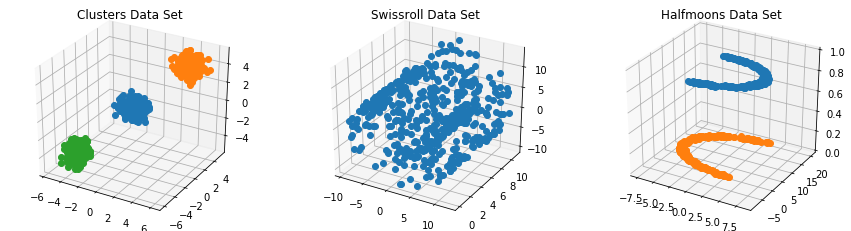

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(15, 4))

#Load Clusters
clusters = np.loadtxt('clusters.txt') 
# print(clusters)
X1_labels = clusters[:,10] 
X1 = clusters[:,0:10]
print('Clusters Data Set:', X1.shape)
ax = fig.add_subplot(131, projection='3d')
for i in range(1,4):
    ax.plot3D(X1[X1_labels==i,0],X1[X1_labels==i,1], X1[X1_labels==i,2],'o');
plt.title('Clusters Data Set');

# Load Data Swissroll
X2 = np.loadtxt('swissroll.txt') 
print('Swissroll Data Set: ', X2.shape)
ax = fig.add_subplot(132, projection='3d')
ax.plot3D(X2[:,0],X2[:,1], X2[:,2],'o');
plt.title('Swissroll Data Set');

#Load Halfmoons
halfmoons = np.loadtxt('halfmoons.txt') 
X3_labels = halfmoons[:,3] 
X3 = halfmoons[:,0:3]
print('Halfmoons Data Set: ',X3.shape)
ax = fig.add_subplot(133, projection='3d')
for i in range(1,4):
    ax.plot3D(X3[X3_labels==i,0],X3[X3_labels==i,1], X3[X3_labels==i,2],'o');
plt.title('Halfmoons Data Set');

# Problem 1

Implement classic MDS, ISOMAP and LLE. 

You should implement these models from scratch. To aid you in this implementation, you can use the follwing functions:

* ```NearestNeighbors``` from the module ```sklearn.neighbors```. This will help in computing neighbors of points.
* ```pdist``` from ```scipy.spatial.distance```. This will help computing pairwise distances between points. 
* ```squareform``` from ```scipy.spatial.distance```. This will help converting the pairwise distances into a square matrix.
* ```numpy``` library (includes linear algebra modules).

### MDS

In [5]:

# D=squareform(Y)
def MDS(D,dim=2):
 n=D.shape[0]
 Dsqrt=D**2
 I=np.identity(n)
 one=np.ones(n)
 one = one[np.newaxis, :]
#  print(one.shape)
 oneT=one.T
#  print(oneT.shape)
 J=I-((one*oneT)/n)
 B=-(J@Dsqrt@J)/2
 l, v = np.linalg.eigh(B)
 a = l.argsort()[::-1]
 A = v[:,a[:2]] * np.sqrt(l[a[:2]])
 return A


### ISOMAP

In [8]:
 def floydWarshal(D):
    for k in range(len(D)): 
        for i in range(len(D)): 
            for j in range(len(D)): 
                D[i][j] = min(D[i][j] , 
                                  D[i][k]+D[k][j] 
                                ) 
    return D

In [9]:
def isomap(D,k=10):
#  k=10
 knn_matrix = np.zeros((len(D), k))
 Dnew=np.zeros((len(D), len(D)))
 total=len(Y)-1
 res=copy.deepcopy(D)
 # print(D[0,:])
 for i in range(len(D)):
    knn_matrix[i] = D[i,:].argsort()[1:k+1]
    for j in range(len(D)):
        if j not in knn_matrix[i]:
            res[i][j]=100
 floydWarshal(res)
#  plt.scatter(A[:,0],A[:,1],c=X1_labels); plt.show();
 return res
# knn_matrix.shape

In [10]:

# A=isomap(D)
# # print(A)
# A.shape

In [11]:
# #  for i in range(len(A)): 
# #         print(A[i])
# A.shape

In [14]:
# # D[D == np.inf] = 100
# A=MDS(A,2)
# print(A)
# A.shape

### Locally Linear Embedding (LLE)

In [16]:
def lle(X1,D,k=10,dim=2): 
 Knearestneigh = np.argsort(D, axis=1)[:, 1:k+1]
 n = D.shape[0]
 w = np.zeros((n, n))
 for i in range(n):
   k_indexes = Knearestneigh[i,:]
#   print(X1[k_indexes, :])
   neighbors = X1[k_indexes, :] - X1[i, :]
#   print(neighbors)
   gramInv = np.linalg.pinv(np.dot(neighbors, neighbors.T))  
   lam = 2/np.sum(gramInv)
   w[i, k_indexes] = lam*np.sum(gramInv, axis=1)/2
 m = np.subtract(np.eye(n), w)
 val, res = np.linalg.eigh(np.dot(np.transpose(m), m))
 reslle=res[:, 1:dim+1]
#  plt.scatter(reslle[:,0],reslle[:,1],c=X1_labels); plt.show();
 return reslle

# Problem 2

Using your code, project each data set down to 2-dimensions using classic MDS, ISOMAP and LLE.

Include a discussion describing whether you think MDS, ISOMAP and LLE are able to identify the intrinsic "manifold" structure of the data with an explanation of why or why not. Be sure this discussion addresses the "goal" of the data set outlined above.

## Clusters Data Set

#### MDS

(600, 2)


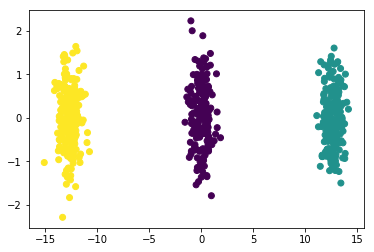

In [17]:
Y = pdist(X1, 'euclidean')
D=squareform(Y)
A=MDS(D,2)
print(A.shape)
plt.scatter(A[:,0],A[:,1],c=X1_labels); plt.show();

#### ISOMAP

(600, 2)


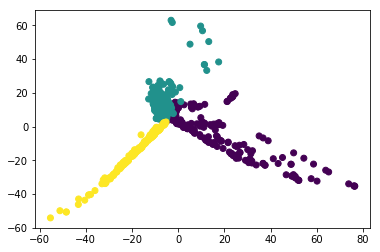

In [26]:
Y = pdist(X1, 'euclidean')
D=squareform(Y)
A=isomap(D,2)
A=MDS(A,2)
print(A.shape)
plt.scatter(A[:,0],A[:,1],c=X1_labels); plt.show();

#### Locally Linear Embedding (LLE)

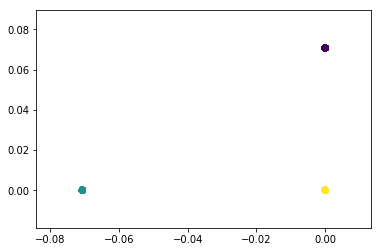

In [19]:
Y = pdist(X1, 'euclidean')
D=squareform(Y)
reslle=lle(X1,D,10,2)
print(reslle.shape)
plt.scatter(reslle[:,0],reslle[:,1],c=X1_labels); plt.show();

For cluster Data set MDS will be the best approach as the groups are not connected and here each group is classified into separate classes, so the euclidian distance which is used by MDS is well suited for this case. MDS tries to preserve the distances between each pair of points in the dataset and as each classes are well seperated MDS is best for this case. we can also see from above graph that MDS is properly projecting 3 groups in 2 dimension space. 

## Swiss Roll Data Set

#### MDS

(500, 2)


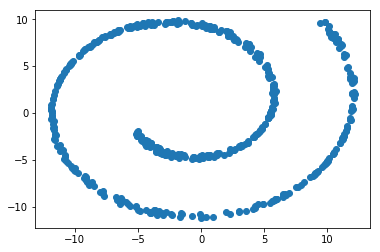

In [20]:
Y = pdist(X2, 'euclidean')
D=squareform(Y)
A=MDS(D,2)
print(A.shape)
plt.scatter(A[:,0],A[:,1]); plt.show();

### ISOMAP

(500, 2)


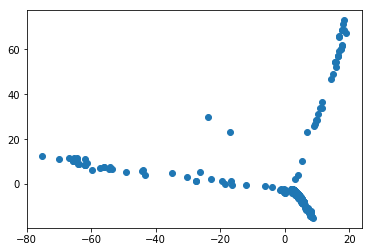

In [24]:
Y = pdist(X2, 'euclidean')
D=squareform(Y)
A=isomap(D,2)
A=MDS(A,2)
print(A.shape)
plt.scatter(A[:,0],A[:,1]); plt.show();

#### Locally Linear Embedding (LLE)

(500, 2)


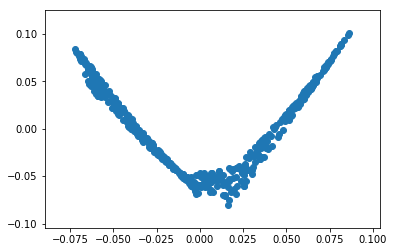

In [38]:
Y = pdist(X2, 'euclidean')
D=squareform(Y)
# print(D)
reslle=lle(X2,D,10,2)
print(reslle.shape)
plt.scatter(reslle[:,0],reslle[:,1]); plt.show();

Here neighboring points on the surface should remain neighbors after dimensionality reduction and points far on the surface 
should remain far from each other after dimensionality reduction so as MDS is unable to unfold the roll so it will not be that suited for this case. we have to use geodesic distances in this to make sure that neighbours will remain same in reduced dimension. Here ISOMAP will be well suited for this case as ISOMAP tries to reconstruct data points as a weighted sum of each neighbors and so it preservers the smae neighbors in reduced dimension.

## Half moons Data Set

#### MDS

(500, 2)


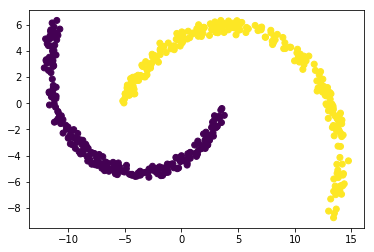

In [22]:
Y = pdist(X3, 'euclidean')
D=squareform(Y)
A=MDS(D,2)
print(A.shape)
plt.scatter(A[:,0],A[:,1],c=X3_labels); plt.show();

#### ISOMAP

(500, 2)


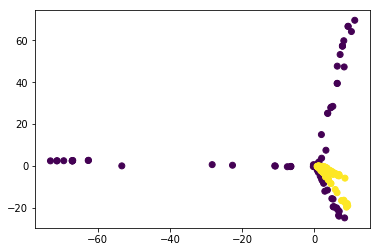

In [25]:
Y = pdist(X3, 'euclidean')
D=squareform(Y)
A=isomap(D,2)
A=MDS(A,2)
print(A.shape)
plt.scatter(A[:,0],A[:,1],c=X3_labels); plt.show();

#### Locally Linear Embedding (LLE)

(500, 2)


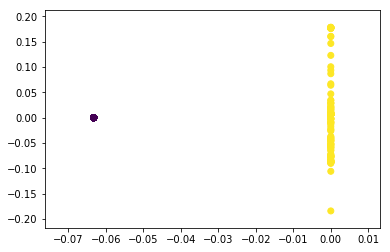

In [29]:
Y = pdist(X3, 'euclidean')
D=squareform(Y)
# print(D)
reslle=lle(X3,D,10,2)
print(reslle.shape)
plt.scatter(reslle[:,0],reslle[:,1],c=X3_labels); plt.show();

Here we can't use MDS as it will create overlaping problems as data sets are curved and mds will unable to straighten this data. Here LLE will be well suited as it tries to preserve only the distances between neighboring points. LLE can unroll the data in a way that keeps the lengths of the lines approximately the same and as two goups of data are classified as seperate classes, here LLE will be the optimum choice. We can also observe from the graph above that in LLE projection of data in 2D we can classify two classes properly. 


## Submit your Solution

Create a PDF of the notebook with your solutions.

Submit both your notebook and the PDF of your notebook to Homework 4 assignment page on Canvas.

* For full credit consideration, make sure all output cells do not show any errors and all code is visible.